In [1]:
import mdptoolbox, mdptoolbox.example
import imageio
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import json
import pandas as pd
import seaborn as sns
import json
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
%matplotlib inline

In [53]:
#DEFUNCT!!!

rewards = np.array([[0,0],
                    [1000,100],
                    [10000,1000],
                    [100000,10000]])


play_matrix = np.array([[1,0,0,0],\
                        [0.25,0,0.75,0],\
                        [0.75,0,0,0.25],\
                        [1,0,0,0]])


quit_matrix = np.array([[1,0,0,0],\
                        [1,0,0,0],\
                        [1,0,0,0],\
                        [1,0,0,0]])

trans_matrix = np.array([play_matrix,quit_matrix])
#correct, incorrect, quit
discount = 0.9

pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
pi.run()
print pi.V
print pi.policy

(-0.0, 22937.499999999996, 32499.999999999993, 100000.0)
(0, 0, 0, 0)


In [112]:
#rewards = np.array([[0,0],#State: Loser!
#                    [1000,100],
#                    [10000,1000],
#                    [100000,10000],
#                    [0,3000]]) #State: I quit.
rewards = np.array([[0,0],#State: Loser!
                    [100,0],
                    [1000,0],
                    [10000,0],
                    [0,100]]) #State: I quit.


#play_matrix = np.array([[1,0,0,0,0],#State: Loser!
#                        [0.25,0,0.75,0,0],
#                        [0.75,0,0,0.25,0],
#                        [0.99,0,0,0,0.01],
#                        [0,0,0,0,1]]) #State: I quit.
play_matrix = np.array([[1,0,0,0,0],#State: Loser!
                        [0.2,0,0.8,0,0], #Prob. first question right
                        [0.2,0,0,0.8,0],
                        [0.2,0,0,0,0.8],
                        [0,0,0,0,1]]) #State: I quit.


quit_matrix = np.array([[1,0,0,0,0],\
                        [0,0,0,0,1],\
                        [0,0,0,0,1],\
                        [0,0,0,0,1],\
                        [0,0,0,0,1]])

trans_matrix = np.array([play_matrix,quit_matrix])
#correct, incorrect, quit
discount = 0.9

pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
pi.run()
print pi.V
print pi.policy[1:len(pi.policy)-1]

(-0.0, 6377.2480000000005, 8718.4, 10719.999999999998, 1000.0000000000002)
(0, 0, 0)


In [201]:
def rewards_func(x,power=2):
    return x**power

def build_rewards(num_questions=3,quit_reward=10,rewards_power=2):
    loser = [0,0]
    quit = [0,quit_reward]
    rewards = [loser]
    for i in range(1,num_questions+1):
        rewards.append([rewards_func(i,rewards_power),0])
    rewards.append(quit)
    return np.array(rewards)

def probs_func(x,power=-1):
    trans = float(x)**(power)
    return (trans,1.-trans)

def build_probabilities(num_questions=3,probs_power=-1):
    play_matrix = [[1.]+list(np.zeros(num_questions+1))]
    for i in range(1,num_questions+1):
        prob,surv = probs_func(i,probs_power)
        play_matrix.append([prob]+list(np.zeros(i))+\
                           [surv]+list(np.zeros(num_questions-i)))
    play_matrix.append(list(np.zeros(num_questions+1))+[1.])
    play_matrix = np.array(play_matrix)
    
    quit_matrix = [[1.]+list(np.zeros(num_questions+1))]
    for i in range(0,num_questions+1):
        quit_matrix.append(list(np.zeros(num_questions+1))+[1.])
    quit_matrix = np.array(quit_matrix)
    return np.array([play_matrix,quit_matrix])
#print build_probabilities(4)
rewards = build_rewards(4)
trans_matrix = build_probabilities(4)

In [173]:
states=100
rewards = build_rewards(states,quit_reward=10000)
trans_matrix = build_probabilities(states)
pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
pi.run()
#print pi.V
P_100 = pi.policy[1:len(pi.policy)-1]

vi = mdptoolbox.mdp.ValueIteration(trans_matrix, rewards, discount)
vi.run()
#print vi.V
V_100 = vi.policy[1:len(vi.policy)-1]

states=200
rewards = build_rewards(states,quit_reward=10000)
trans_matrix = build_probabilities(states)
pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
pi.run()
#print pi.V
P_200 = pi.policy[1:len(pi.policy)-1]

vi = mdptoolbox.mdp.ValueIteration(trans_matrix, rewards, discount)
vi.run()
#print vi.V
V_200 = vi.policy[1:len(vi.policy)-1]

states=500
rewards = build_rewards(states,quit_reward=10000)
trans_matrix = build_probabilities(states)
pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
pi.run()
#print pi.V
P_500 = pi.policy[1:len(pi.policy)-1]

vi = mdptoolbox.mdp.ValueIteration(trans_matrix, rewards, discount)
vi.run()
#print vi.V
V_500 = vi.policy[1:len(vi.policy)-1]

states=1000
rewards = build_rewards(states,quit_reward=10000)
trans_matrix = build_probabilities(states)
pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
pi.run()
#print pi.V
P_1000 = pi.policy[1:len(pi.policy)-1]

vi = mdptoolbox.mdp.ValueIteration(trans_matrix, rewards, discount)
vi.run()
#print vi.V
V_1000 = vi.policy[1:len(vi.policy)-1]

#q = mdptoolbox.mdp.QLearning(trans_matrix, rewards, discount)
#q.run()
##print q.V
#print q.policy[1:len(q.policy)-1]

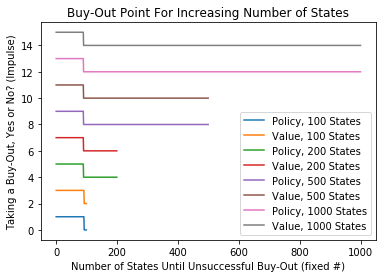

In [182]:
plt.figure()
plt.plot(range(0,100),np.array(P_100),label='Policy, 100 States')
plt.plot(range(0,100),np.array(V_100)+[2],label='Value, 100 States')

plt.plot(range(0,200),np.array(P_200)+[4],label='Policy, 200 States')
plt.plot(range(0,200),np.array(V_200)+[6],label='Value, 200 States')

plt.plot(range(0,500),np.array(P_500)+[8],label='Policy, 500 States')
plt.plot(range(0,500),np.array(V_500)+[10],label='Value, 500 States')

plt.plot(range(0,1000),np.array(P_1000)+[12],label='Policy, 1000 States')
plt.plot(range(0,1000),np.array(V_1000)+[14],label='Value, 1000 States')
plt.legend()
plt.xlabel('Number of States Until Unsuccessful Buy-Out (fixed #)')
plt.ylabel('Taking a Buy-Out, Yes or No? (Impulse)')
plt.title('Buy-Out Point For Increasing Number of States')
plt.show()

In [193]:
states = 400
P_iter_questions_p1 = []
P_iter_questions_p2 = []
P_iter_questions_p3 = []
P_iter_questions_p4 = []
for i in range(100,10001,100):
    rewards = build_rewards(states,quit_reward=i,rewards_power=1)
    trans_matrix = build_probabilities(states)
    pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
    pi.run()
    #print pi.V
    P_iter_questions_p1.append(sum(pi.policy[1:len(pi.policy)-1]))

    
    rewards = build_rewards(states,quit_reward=i,rewards_power=2)
    trans_matrix = build_probabilities(states)
    pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
    pi.run()
    #print pi.V
    P_iter_questions_p2.append(sum(pi.policy[1:len(pi.policy)-1]))

    
    rewards = build_rewards(states,quit_reward=i,rewards_power=3)
    trans_matrix = build_probabilities(states)
    pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
    pi.run()
    #print pi.V
    P_iter_questions_p3.append(sum(pi.policy[1:len(pi.policy)-1]))


    rewards = build_rewards(states,quit_reward=i,rewards_power=4)
    trans_matrix = build_probabilities(states)
    pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
    pi.run()
    #print pi.V
    P_iter_questions_p4.append(sum(pi.policy[1:len(pi.policy)-1]))


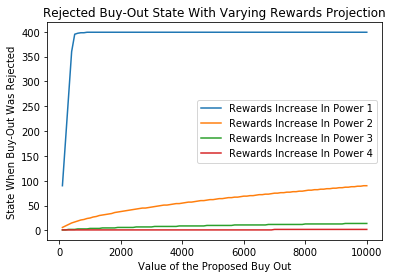

In [200]:
plt.figure()
plt.plot(range(100,10001,100),P_iter_questions_p1,label='Rewards Increase In Power 1')
plt.plot(range(100,10001,100),P_iter_questions_p2,label='Rewards Increase In Power 2')
plt.plot(range(100,10001,100),P_iter_questions_p3,label='Rewards Increase In Power 3')
plt.plot(range(100,10001,100),P_iter_questions_p4,label='Rewards Increase In Power 4')
plt.legend()
plt.xlabel('Value of the Proposed Buy Out')
plt.ylabel('State When Buy-Out Was Rejected')
plt.title('Rejected Buy-Out State With Varying Rewards Projection')
plt.show()

In [205]:
states = 400
P_iter_questions_probs_p1 = []
P_iter_questions_probs_p2 = []
P_iter_questions_probs_p3 = []
P_iter_questions_probs_p4 = []
for i in range(100,10001,100):
    rewards = build_rewards(states,quit_reward=i,rewards_power=2)
    trans_matrix = build_probabilities(states,probs_power=-0.5)
    pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
    pi.run()
    #print pi.V
    P_iter_questions_probs_p1.append(sum(pi.policy[1:len(pi.policy)-1]))

    
    rewards = build_rewards(states,quit_reward=i,rewards_power=2)
    trans_matrix = build_probabilities(states,probs_power=-1)
    pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
    pi.run()
    #print pi.V
    P_iter_questions_probs_p2.append(sum(pi.policy[1:len(pi.policy)-1]))

    
    rewards = build_rewards(states,quit_reward=i,rewards_power=2)
    trans_matrix = build_probabilities(states,probs_power=-1.5)
    pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
    pi.run()
    #print pi.V
    P_iter_questions_probs_p3.append(sum(pi.policy[1:len(pi.policy)-1]))


    rewards = build_rewards(states,quit_reward=i,rewards_power=2)
    trans_matrix = build_probabilities(states,probs_power=-2)
    pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
    pi.run()
    #print pi.V
    P_iter_questions_probs_p4.append(sum(pi.policy[1:len(pi.policy)-1]))


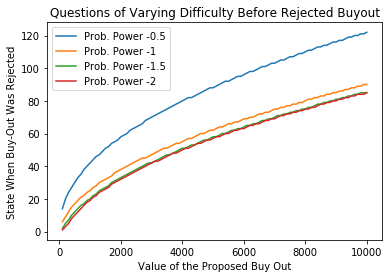

In [208]:
plt.figure()
plt.plot(range(100,10001,100),P_iter_questions_probs_p1,label='Prob. Power -0.5')
plt.plot(range(100,10001,100),P_iter_questions_probs_p2,label='Prob. Power -1')
plt.plot(range(100,10001,100),P_iter_questions_probs_p3,label='Prob. Power -1.5')
plt.plot(range(100,10001,100),P_iter_questions_probs_p4,label='Prob. Power -2')
plt.legend()
plt.xlabel('Value of the Proposed Buy Out')
plt.ylabel('State When Buy-Out Was Rejected')
plt.title('Questions of Varying Difficulty Before Rejected Buyout')
plt.show()

In [219]:
states=200
discount=0.9
rewards = build_rewards(states,quit_reward=10000)
trans_matrix = build_probabilities(states)
pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
pi.run()
#print pi.V
P_200 = pi.policy[1:len(pi.policy)-1]

vi = mdptoolbox.mdp.ValueIteration(trans_matrix, rewards, discount)
vi.run()
#print vi.V
V_200 = vi.policy[1:len(vi.policy)-1]

q = mdptoolbox.mdp.QLearning(trans_matrix, rewards, discount,n_iter=10000)
q.run()
Q_200_1 = q.policy[1:len(q.policy)-1]

q = mdptoolbox.mdp.QLearning(trans_matrix, rewards, discount,n_iter=50000)
q.run()
Q_200_2 = q.policy[1:len(q.policy)-1]

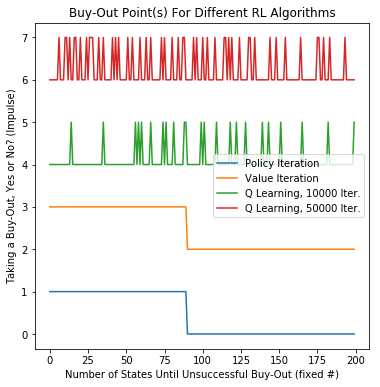

In [223]:
plt.figure(figsize=(6,6))
plt.plot(range(0,200),np.array(P_200),label='Policy Iteration')
plt.plot(range(0,200),np.array(V_200)+[2],label='Value Iteration')
plt.plot(range(0,200),np.array(Q_200_1)+[4],label='Q Learning, 10000 Iter.')
plt.plot(range(0,200),np.array(Q_200_2)+[6],label='Q Learning, 50000 Iter.')
plt.legend()
plt.xlabel('Number of States Until Unsuccessful Buy-Out (fixed #)')
plt.ylabel('Taking a Buy-Out, Yes or No? (Impulse)')
plt.title('Buy-Out Point(s) For Different RL Algorithms')
plt.show()

In [225]:
pi_time = []
vi_time = []
q_time_d = []
q_time = []
for i in range(10,151,10):
    rewards = build_rewards(i,quit_reward=1000)
    trans_matrix = build_probabilities(i)

    pi = mdptoolbox.mdp.PolicyIteration(trans_matrix, rewards, discount)
    pi.run()
    pi_time.append(pi.time)
    vi = mdptoolbox.mdp.ValueIteration(trans_matrix, rewards, discount)
    vi.run()
    vi_time.append(vi.time)
    q = mdptoolbox.mdp.QLearning(trans_matrix, rewards, discount)
    q.run()
    q_time_d.append(q.time)
    q = mdptoolbox.mdp.QLearning(trans_matrix, rewards, discount,n_iter=50000)
    q.run()
    q_time.append(q.time)

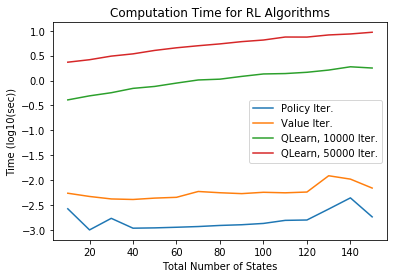

In [230]:
plt.figure()
plt.plot(range(10,151,10),np.log10(np.array(pi_time)),label='Policy Iter.')
plt.plot(range(10,151,10),np.log10(np.array(vi_time)),label='Value Iter.')
plt.plot(range(10,151,10),np.log10(np.array(q_time_d)),label='QLearn, 10000 Iter.')
plt.plot(range(10,151,10),np.log10(np.array(q_time)),label='QLearn, 50000 Iter.')
plt.xlabel('Total Number of States')
plt.ylabel('Time (log10(sec))')
plt.title('Computation Time for RL Algorithms')
plt.legend()
plt.show()